In [1]:
# Copyright 2021 Google
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
!pip install cirq --pre

In [3]:
import cirq
import numpy as np
import matplotlib.pyplot as plt
import recirq.time_crystals as time_crystals

In [4]:
# dir to pull data from
base_dir = time_crystals.DEFAULT_BASE_DIR

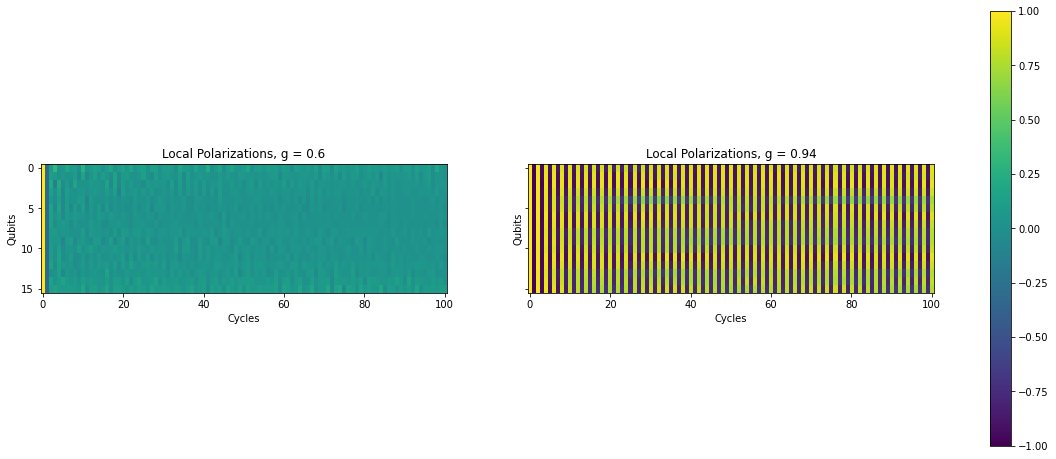

In [5]:
filename = f'{base_dir}/2d.json'
average_polarizations = cirq.read_json(filename)

# prepare subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), sharey=True, sharex=True)

g_labels = ['0.6', '0.94']

for g, axis, polarizations in zip(g_labels, axes, average_polarizations):

    # switch axes
    polarizations = list(zip(*polarizations))
    
    # plot polarizations as an image
    artist = axis.imshow(polarizations, aspect = 2.0, vmin=-1.0, vmax=1.0)

    # add labels and colorbar and title
    axis.set_xlabel('Cycles')
    axis.set_ylabel('Qubits')
    axis.set_title('Local Polarizations, g = ' + str(g))
    
# add colorbar
fig.colorbar(artist, ax=axes.ravel().tolist())

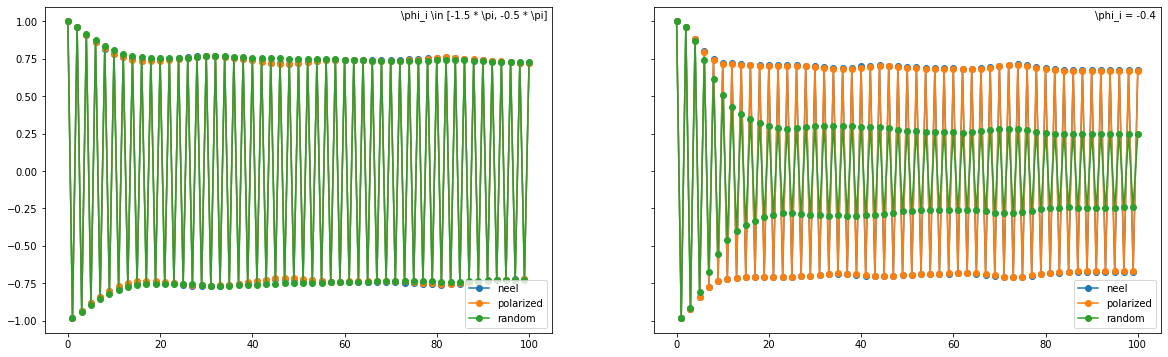

In [6]:
filename = f'{base_dir}/3a.json'
average_polarizations = cirq.read_json(filename)

# prepare subplot axes
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(20, 6))

# prepare labels
phi_labels = ['\phi_i \in [-1.5 * \pi, -0.5 * \pi]', '\phi_i = -0.4']
initial_state_labels = ['neel', 'polarized', 'random']

# plot and label
for axis, cycles_by_initial_state in zip(axes, average_polarizations):
    for initial_state_label, cycles in zip(initial_state_labels, cycles_by_initial_state):
        axis.plot(cycles, marker='o', label=initial_state_label)

# add phi labels and legend to each subplot
for phi_label, axis in zip(phi_labels, axes): 
    axis.text(0.99, 0.99, phi_label, horizontalalignment='right', verticalalignment='top', transform=axis.transAxes)
    axis.legend(loc='lower right')


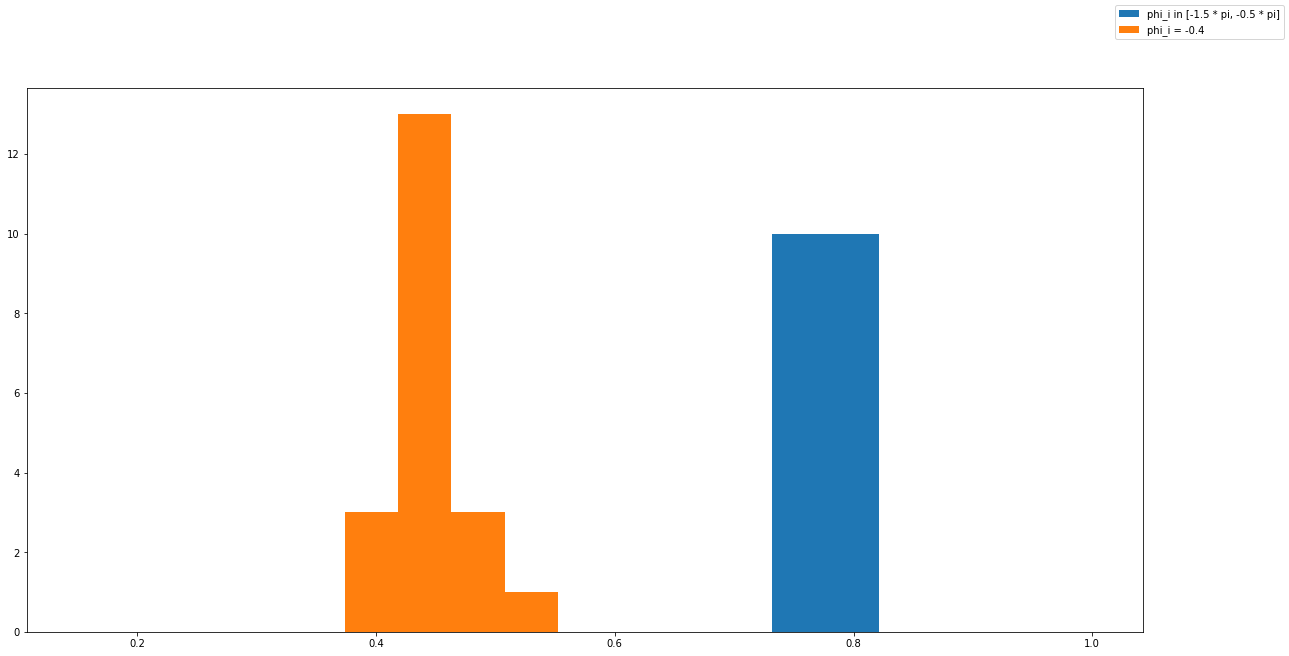

In [7]:
filename = f'{base_dir}/3b.json'
average_polarizations = cirq.read_json(filename)
    
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

# set phi labels
phi_labels = ['phi_i in [-1.5 * pi, -0.5 * pi]', 'phi_i = -0.4']

for phi_label, average_polarizations in zip(phi_labels, average_polarizations):
    # plot in a histogram
    axis.hist(average_polarizations, label=phi_label, bins=np.linspace(0.15, 1.0, 20))
    
# add legend and show
fig.legend()

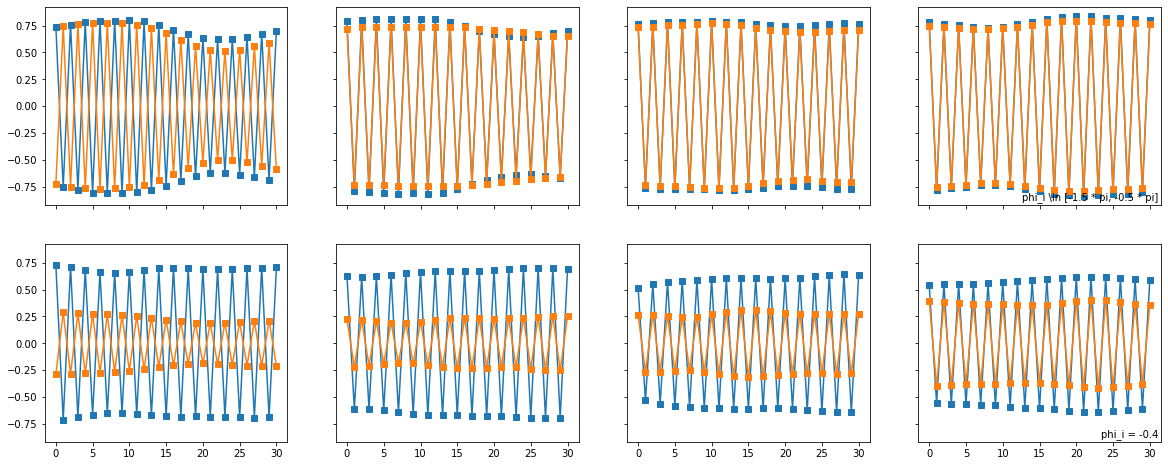

In [8]:
filename = f'{base_dir}/3c.json'
average_polarizations = cirq.read_json(filename)

num_qubits = 16
disturb_qubit = 11
polarized_initial_state = [0]*num_qubits
disturbed_polarized_initial_state = list(polarized_initial_state)
disturbed_polarized_initial_state[disturb_qubit] = 1
initial_states = [polarized_initial_state, disturbed_polarized_initial_state]

# prepare subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,8), sharey=True, sharex=True)

for phi_axes, data_by_initial_state in zip(axes, average_polarizations): 
    for initial_state, data in zip(initial_states, data_by_initial_state):
        for qubit_index, axis in enumerate(phi_axes):
            # subset to qubit index, swap indices, plot
            points = np.asarray(data)[:, qubit_index]
            axis.plot(points, marker='s', label=''.join(map(str, initial_state)))

# set phi labels
phi_labels = ['phi_i \in [-1.5 * pi, -0.5 * pi]', 'phi_i = -0.4']

# add phi labels
for phi_label, axis in zip(phi_labels, [axes[0][3], axes[1][3]]): 
    fig.text(0.99, 0.01, phi_label, horizontalalignment='right', verticalalignment='bottom', transform=axis.transAxes)


CPU times: user 69.1 ms, sys: 482 µs, total: 69.6 ms
Wall time: 67.9 ms


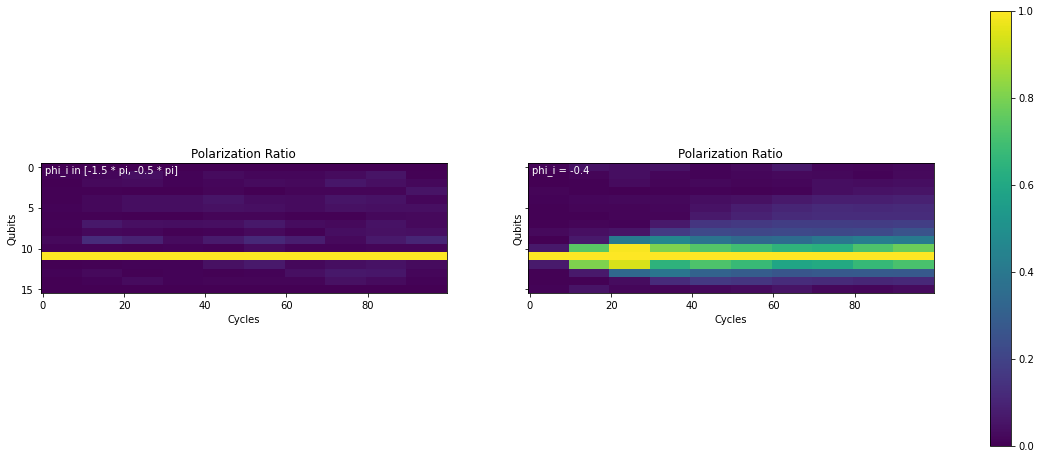

In [9]:
%%time

filename = f'{base_dir}/3d.json'
average_polarizations = np.asarray(cirq.read_json(filename))

num_cycles = 100

# the size of window to average cycles over
cycle_window = 10

# prepare subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), sharey=True, sharex=True)

for average_polarizations_for_phi, axis in zip(average_polarizations, axes):

    # compare the two polarization signals with signal_ratio
    polarization_ratio = time_crystals.signal_ratio(*average_polarizations_for_phi)

    # define window indices
    subdivisions = np.arange(cycle_window, num_cycles + 1, cycle_window)

    # divide into cycles_window width sections and discard a final window that isn't full size
    polarization_ratio_windows = np.split(polarization_ratio, subdivisions, axis=0)
    if not polarization_ratio_windows[0].shape == polarization_ratio_windows[-1].shape: 
        polarization_ratio_windows = polarization_ratio_windows[:-1]
    
    # stack windows into a new axis
    polarization_ratio_by_windows = np.stack(polarization_ratio_windows, axis=0)
    
    # average over cycle windows
    average_polarization_ratio_by_windows = np.mean(polarization_ratio_by_windows, axis=1)

    # repeat along the cycles axis, to return to original shape
    average_polarization_ratio = np.repeat(average_polarization_ratio_by_windows, cycle_window, axis=0)

    # plot polarizations as an image
    artist = axis.imshow(average_polarization_ratio.transpose(), aspect = 2.0, vmin=0, vmax=1.0)

    # add labels and colorbar and title
    axis.set_xlabel('Cycles')
    axis.set_ylabel('Qubits')
    axis.set_title('Polarization Ratio')
    
# add colorbar
fig.colorbar(artist, ax=axes.ravel().tolist())

# set phi labels
phi_labels = ['phi_i in [-1.5 * pi, -0.5 * pi]', 'phi_i = -0.4']

# add phi labels
for phi_label, axis in zip(phi_labels, axes): 
    fig.text(0.01, 0.99, phi_label, horizontalalignment='left', verticalalignment='top', transform=axis.transAxes, color='white')


['phi_i in [-1.5 * pi, -0.5 * pi]', 'phi_i = -0.4']


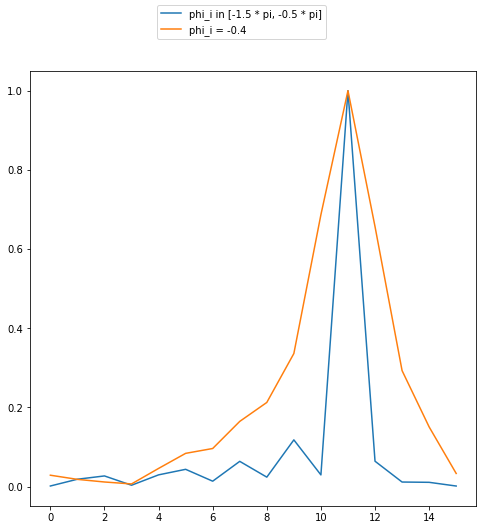

In [10]:
# Slice graph

# prepare subplots
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

print(phi_labels)
for polarizations, phi_label in zip(average_polarizations, phi_labels):

    # compare the two polarization signals with signal_ratio
    polarization_ratio = time_crystals.signal_ratio(*polarizations)

    # only consider one window's worth of cycles
    restricted_polarization_ratio = polarization_ratio[51:61, :]

    # average over cycles
    average_polarization_ratio = np.mean(restricted_polarization_ratio, axis=0)
    
    # plot line
    axis.plot(average_polarization_ratio, label=phi_label)

# add legend
fig.legend(loc='upper center')